<a href="https://colab.research.google.com/github/hy30n80/Data-Structure-/blob/main/HW_08_binary_search_tree_avl_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EC2202 Homework #8 (Due: 1:00 pm, May. 21, 2024)

**Disclaimer**
This homework is based on
1. [GeeksforGeeks](https://practice.geeksforgeeks.org/home)
1. [MIT 6.006 (Professor Erik Demaine, Dr. Jason Ku, and Professor Justin Solomon)](https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-006-introduction-to-algorithms-spring-2020/index.htm)


## Submission Link

**Submit the sharing link :)**
- Submit by [clicking here](https://forms.gle/6YbuC7dUXWruefD3A)!
- Check your sumbission by [clicking here](https://docs.google.com/spreadsheets/d/1C1g24boC_rwiUUqS4RJ-EECokFz6SHVSxWoI5jJxIS0/edit?usp=sharing)!

## Student Information

* Student ID: YOUR ID
* Name: YOUR NAME

## Evaluation Code Setting

Run the blow to test your implementation :)

In [2]:
import doctest

class _Node():
  def __init__(self, value, left=None, right=None):
    self.data = value
    self.left = left
    self.right = right

  def list_to_tree(self, i_list, i):
    if (2*i+1) < len(i_list) and i_list[2*i+1] is not None:
      l = _Node(i_list[2*i+1])
      self.left = l
      l.list_to_tree(i_list, 2*i+1)
    if (2*i+2) < len(i_list) and i_list[2*i+2] is not None:
      r = _Node(i_list[2*i+2])
      self.right = r
      r.list_to_tree(i_list, 2*i+2)


class BinarySearchTree():

  def __init__(self) :
    self.root = None

  def insert(self,data) :
    self.root = self.insert_value(self.root,data)

    return self.root is not None

  def insert_value(self,node,data) :
    if node is None :
      node = _Node(data)
    else :
      if data < node.data :
        node.left = self.insert_value(node.left,data)
      else :
        node.right = self.insert_value(node.right,data)

    return node

def test_bst(i_list) :
  test = BinarySearchTree()
  for k in range(0,len(i_list)) :
    if k==0 :
      test.insert(i_list[0])
    else:
      test.insert_value(test.root,i_list[k])

  return test.root

## Q1

[ACM-ICPC Asia Phuket Regional Contest 2011, B] Given the pre-order traversal of a binary search tree (BST), your task is to find the post-order traversal of this tree. The BST properties are such that the left subtree contains only nodes with keys less than the node's key, the right subtree contains only nodes with keys greater than the node's key, and both subtrees must also be BSTs. The challenge is to convert the given pre-order traversal sequence into a post-order traversal sequence without constructing the tree explicitly.

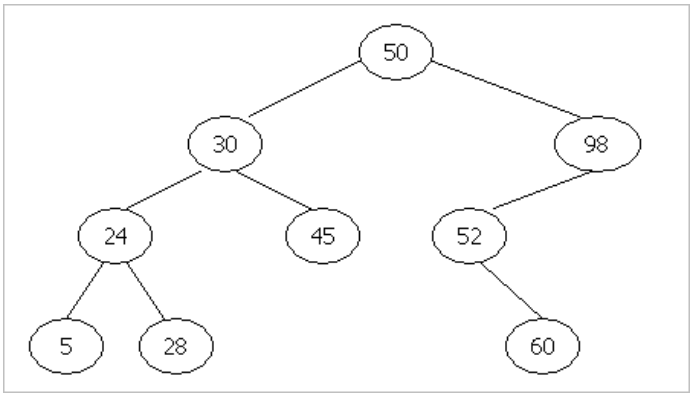

**Pre-order traversal** (Root-Left-Right) : 50 30 24 5 28 45 98 52 60

**Post-order traversal** (Left-Right-Root) : 5 28 24 45 30 60 52 98 50

In [9]:
def get_post_order(pre_order) :
    """
    >>> get_post_order([50, 30, 24, 5, 28, 45, 98, 52, 60])
    5 28 24 45 30 60 52 98 50
    >>> get_post_order([50, 30, 24, 5, 27, 25, 26, 28, 29, 45, 98, 52, 60, 106, 109, 108, 110])
    5 26 25 29 28 27 24 45 30 60 52 108 110 109 106 98 50
    >>> get_post_order([50, 30, 24, 5, 28, 45, 98, 52, 60])
    5 28 24 45 30 60 52 98 50
    """
    # YOUR CODE HERE
    b_tree = test_bst(pre_order)

    def print_post_order(node):
      if node is not None:
        print_post_order(node.left)
        print_post_order(node.right)
        print(node.data, end=" ")

    print_post_order(b_tree)

In [10]:
doctest.run_docstring_examples(get_post_order, globals(), False, __name__)

**********************************************************************
File "__main__", line 3, in __main__
Failed example:
    get_post_order([50, 30, 24, 5, 28, 45, 98, 52, 60])
Expected:
    5 28 24 45 30 60 52 98 50
Got:
    5 28 24 45 30 60 52 98 50 
**********************************************************************
File "__main__", line 5, in __main__
Failed example:
    get_post_order([50, 30, 24, 5, 27, 25, 26, 28, 29, 45, 98, 52, 60, 106, 109, 108, 110])
Expected:
    5 26 25 29 28 27 24 45 30 60 52 108 110 109 106 98 50
Got:
    5 26 25 29 28 27 24 45 30 60 52 108 110 109 106 98 50 
**********************************************************************
File "__main__", line 7, in __main__
Failed example:
    get_post_order([50, 30, 24, 5, 28, 45, 98, 52, 60])
Expected:
    5 28 24 45 30 60 52 98 50
Got:
    5 28 24 45 30 60 52 98 50 


## Q2

Given a Binary Search Tree, find the sum of all leaf nodes.

**Tree is not empty**


In [11]:
def sum_leaf_nodes(first_node):
    """
    >>> sum_leaf_nodes(test_bst([7,3,8,1,5,10,4]))
    15
    >>> sum_leaf_nodes(test_bst([3]))
    3
    >>> sum_leaf_nodes(test_bst([10,9,8,7,6,5,4,3,2,1]))
    1
    >>> sum_leaf_nodes(test_bst([3,3,3,3,3,3,3,4]))
    4
    >>> sum_leaf_nodes(test_bst([10,100,1000,10000]))
    10000
    >>> sum_leaf_nodes(test_bst([3,3,3,3,3,3,3,1]))
    4
    >>> sum_leaf_nodes(test_bst([1,1,10,2,3,4,3,2,3,3,1]))
    6
    """
    # YOUR CODE HERE
    if first_node is None:
      return 0

    if first_node.left is None and first_node.right is None:
      return first_node.data

    return sum_leaf_nodes(first_node.left) + sum_leaf_nodes(first_node.right)

In [12]:
doctest.run_docstring_examples(sum_leaf_nodes, globals(), False, __name__)

## Q3
[Adobe / Amazon / Microsoft / Qualcomm] Check for BST

Given the root of a binary tree. Check whether it is a BST (Binary Search Tree) or not. A BST is defined as follows:
- The left subtree of a node contains only nodes with keys less than the node's key.
- The right subtree of a node contains only nodes with keys greater than the node's key.
- Both the left and right subtrees must also be BST.

Your task is to complete the function `is_bst()` which takes the root of the tree as a parameter and returns **True** if the given binary tree is BST, else returns **False**. You don't have to create a new binary tree for input list.

Expected Time Complexity: O(N)
Expected Auxiliary Space: O(log N)

Hint: There are two ways. First, you may search whole nodes of trees to check if it is BST. Second, you may use inorder traversal and check if it is ascending order.

NOTE: THERE IS NO DUPLICATED VALUE FOR BST.

Example:
- Input Tree:

<div>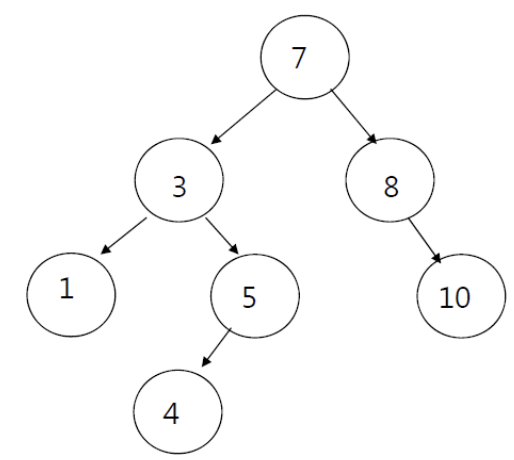</div>

- Output: **True**

In [31]:
### THIS IS FOR MAKING TEST CASES ###
def test_case(i_list) -> _Node :
  root = _Node(i_list[0])
  root.list_to_tree(i_list, 0)
  return root
### THIS IS FOR MAKING TEST CASES ###

def is_bst(root) -> bool:
  """
  >>> is_bst(test_case([7,3,8,1,5,None,10,None,None,4]))
  True
  >>> is_bst(test_case([5,3,8,2,4,7,9,1,None,None,None,6,None,None,10]))
  True
  >>> is_bst(test_case([2,1,3]))
  True
  >>> is_bst(test_case([1]))
  True
  >>> is_bst(test_case([5,3,7,2,4,8,9,1,None,None,None,6,None,None,10]))
  False
  >>> is_bst(test_case([4,1,5,3,2]))
  False
  >>> is_bst(test_case([1,2,3]))
  False
  >>> is_bst(test_case([16,8,24,4,12,20,28,2,6,10,14,18,22,26,30,1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]))
  True
  >>> is_bst(test_case([16,8,24,4,12,20,28,2,6,10,14,15,22,26,30,1,3,5,7,9,11,13,18,17,19,21,23,25,27,29,31]))
  False
  """
  # YOUR CODE HERE

  import math

  if not root:
    return True

  stack = [(root, -math.inf, math.inf)]

  while stack:
    root, lower, upper = stack.pop()

    if not root:
      continue

    val = root.data
    if val <= lower or val >= upper:
      return False

    stack.append((root.right, val, upper))
    stack.append((root.left, lower, val))

  return True




In [32]:
doctest.run_docstring_examples(is_bst, globals(), False, __name__)

##Q4
[Amazon / Samsung / Microsoft] Lowest Common Ancestor in a BST

Given a Binary Search Tree (with all values unique) and two node values. Find the Lowest Common Ancestors of the two nodes in the BST.

Your task is to complete the function `lowest_common_ancestor()` which takes the root Node of the BST and two integer values n1 and n2 as inputs and returns the the data of Lowest Common Ancestor of the Nodes with values n1 and n2 in the given BST.

**Expected Time Complexity**: O(log N)

**Expexted Auxiliary Space**: O(log N)

Example:
- n1 = 1, n2 = 7
- input BST:

<div>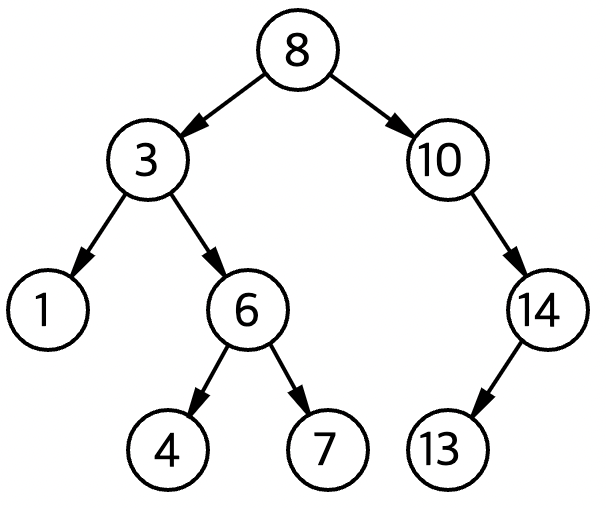</div>

- Output: 3

In [35]:
def lowest_common_ancestor(root, n1, n2):
  """
  >>> lowest_common_ancestor(test_bst([7,3,8,1,5,10,4]), 1, 4)
  3
  >>> lowest_common_ancestor(test_bst([20,10,22,8,15,21,27,2,9,24,40,1]), 21, 24)
  22
  >>> lowest_common_ancestor(test_bst([1,2,3,4,5,6,7,8,9]), 7, 9)
  7
  >>> lowest_common_ancestor(test_bst([8,3,10,1,6,14,4,7,13]), 1, 7)
  3
  >>> lowest_common_ancestor(test_bst([9,8,7,6,5,4,3,10]), 3, 10)
  9
  >>> lowest_common_ancestor(test_bst([2,1,3]), 1, 3)
  2
  >>> lowest_common_ancestor(test_bst([120,60,180,30,90,150,210,15,45,75,105,135,165,195,225]), 180, 195)
  180
  >>> lowest_common_ancestor(test_bst([120,60,180,30,90,150,210,15,45,75,105,135,165,195,225]), 75, 165)
  120
  >>> lowest_common_ancestor(test_bst([1,2]), 1, 2)
  1
  >>> lowest_common_ancestor(test_bst([44,21,68,15,34,52,85,4,17,29,39,48,59,74,91,1,5,16,19,25,31,36,41,45,50,54,63,71,77,86,99]), 59, 86)
  68
  """
  # YOUR CODE HERE

  while root:
    if root.data > n1 and root.data > n2:
      root = root.left

    elif root.data < n1 and root.data < n2:
      root = root.right

    else:
      anc = root
      break

  return anc.data


In [36]:
doctest.run_docstring_examples(lowest_common_ancestor, globals(), False, __name__)

##Q5

[MIT 6.006] The Set Binary Tree T below is **not height-balanced** but does satisfy the
**binary search tree** property, assuming the key of each integer item is itself. For each unbalanced node, draw the two trees that result from rotating the node in the **original** tree left and right (when possible). For each tree drawn, specify whether it is height-balanced, i.e., all nodes satisfy the AVL property

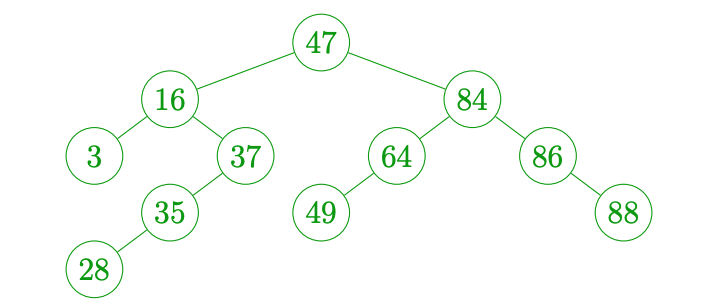

YOUR ANSWER HERE:

##Q6

AVL tree is a self-balancing Binary Search Tree (BST) where the difference between heights of left and right subtrees cannot be more than one for all nodes.

**To make sure that the given tree remains AVL after every insertion, implement insert operation to perform some re-balancing.** Operations for left rotation and right Rotation are two basic operations that can be performed to re-balance a BST without violating the BST property (keys(left) < key(root) < keys(right)).

<br/>

**Your Task**:

Implement insert operation.

`pre_order` and `solution` are functions for grading, so you can ignore this.


<br/>

[Note]

Re-balance the tree by performing appropriate rotations on the subtree rooted with z. There can be 4 possible cases that needs to be handled as x, y and z can be arranged in 4 ways. Following are the possible 4 arrangements:

a) y is left child of z and x is left child of y (Left Left Case)

b) y is left child of z and x is right child of y (Left Right Case)

c) y is right child of z and x is right child of y (Right Right Case)

d) y is right child of z and x is left child of y (Right Left Case)

Following are the operations to be performed in above mentioned 4 cases. In all of the cases, we only need to re-balance the subtree rooted with z and the complete tree becomes balanced as the height of subtree (After appropriate rotations) rooted with z becomes same as it was before insertion.

a) Left Left Case

```
T1, T2, T3 and T4 are subtrees.
         z                                      y
        / \                                   /   \
       y   T4      Right Rotate (z)          x      z
      / \          - - - - - - - - ->      /  \    /  \
     x   T3                               T1  T2  T3  T4
    / \
  T1   T2
```
b) Left Right Case
```
     z                               z                           x
    / \                            /   \                        /  \
   y   T4  Left Rotate (y)        x    T4  Right Rotate(z)    y      z
  / \      - - - - - - - - ->    /  \      - - - - - - - ->  / \    / \
T1   x                          y    T3                    T1  T2 T3  T4
    / \                        / \
  T2   T3                    T1   T2
```
c) Right Right Case
```
  z                                y
 /  \                            /   \
T1   y     Left Rotate(z)       z      x
    /  \   - - - - - - - ->    / \    / \
   T2   x                     T1  T2 T3  T4
       / \
     T3  T4
```
d) Right Left Case
```
   z                            z                            x
  / \                          / \                          /  \
T1   y   Right Rotate (y)    T1   x      Left Rotate(z)   z      y
    / \  - - - - - - - - ->     /  \   - - - - - - - ->  / \    / \
   x   T4                      T2   y                  T1  T2  T3  T4
  / \                              /  \
T2   T3                           T3   T4
```  

In [37]:
class TreeNode(object):
    def __init__(self, val):
      self.val = val
      self.left = None
      self.right = None
      self.height = 1

class AvlTree(object):
  def insert(self, root, key):
    # YOUR CODE HERE (여기만 작성하면 돼)
    if not root:
      return TreeNode(key)
    elif key < root.val:
      root.left = self.insert(root.left, key)
    else:
      root.right = self.insert(root.right, key)

    root.height = 1 + max(self.get_height(root.left), self.get_height(root.right))

    balance = self.get_balance(root)

    #right rotate (case 1)
    if balance > 1 and key < root.left.val:
      return self.right_rotate(root)

    #left rotate (case 3)
    if balance < -1 and key > root.right.val:
      return self.left_rotate(root)

    #left - right rotate (case 2)
    if balance > 1 and key > root.left.val:
      root.left = self.left_rotate(root.left)
      return self.right_rotate(root)

    #right - left rotate (case 4)
    if balance < -1 and key < root.right.val:
      root.right = self.right_rotate(root.right)
      return self.left_rotate(root)

    return root


  def left_rotate(self, z):

    y = z.right
    T2 = y.left

    # Perform rotation
    y.left = z
    z.right = T2

    # Update heights
    z.height = 1 + max(self.get_height(z.left),
            self.get_height(z.right))
    y.height = 1 + max(self.get_height(y.left),
            self.get_height(y.right))

    # Return the new root
    return y

  def right_rotate(self, z):

    y = z.left
    T3 = y.right

    # Perform rotation
    y.right = z
    z.left = T3

    # Update heights
    z.height = 1 + max(self.get_height(z.left),
            self.get_height(z.right))
    y.height = 1 + max(self.get_height(y.left),
            self.get_height(y.right))

    # Return the new root
    return y

  def get_height(self, root):
    if not root:
      return 0

    return root.height

  def get_balance(self, root):
    if not root:
      return 0

    return self.get_height(root.left) - self.get_height(root.right)

  def pre_order(self, root, result):
    if not root:
      return

    result.append(root.val)
    self.pre_order(root.left, result)
    self.pre_order(root.right, result)

def solution(arr):
  """
  >>> solution([10, 20, 30, 40, 50, 25])
  [30, 20, 10, 25, 40, 50]
  >>> solution([10, 10, 20, 20, 30, 30])
  [20, 10, 10, 20, 30, 30]
  >>> solution([70, 20, 25, 23, 55, 17, 19, 82, 99])
  [25, 20, 17, 19, 23, 70, 55, 82, 99]
  >>> solution([9, 1, 8, 2, 7, 3, 6, 4])
  [7, 2, 1, 4, 3, 6, 8, 9]
  >>> solution([-1, 10, 5, 4, 2, -10])
  [2, -1, -10, 5, 4, 10]
  >>> solution([0, 0, 0, 0, 1, 1])
  [0, 0, 0, 0, 1, 1]
  """
  my_tree = AvlTree()
  root = None
  for a in arr:
    root = my_tree.insert(root, a)
  result = []
  my_tree.pre_order(root, result)
  return result

In [38]:
doctest.run_docstring_examples(solution, globals(), False, __name__)